# **Actividad 1**
Realiza un programa en Python que represente una imagen digital con diferentes niveles de
cuantización. Desarrolla el programa que permita controlar el valor de k-bits y que el usuario
pueda escoger entre diferentes imágenes (mínimo 3) a color o escala de grises (por ejemplo, un
slider o un menú dentro de la herramienta de Colab). En la figura se muestra un ejemplo de una
imagen y diferentes representaciones.

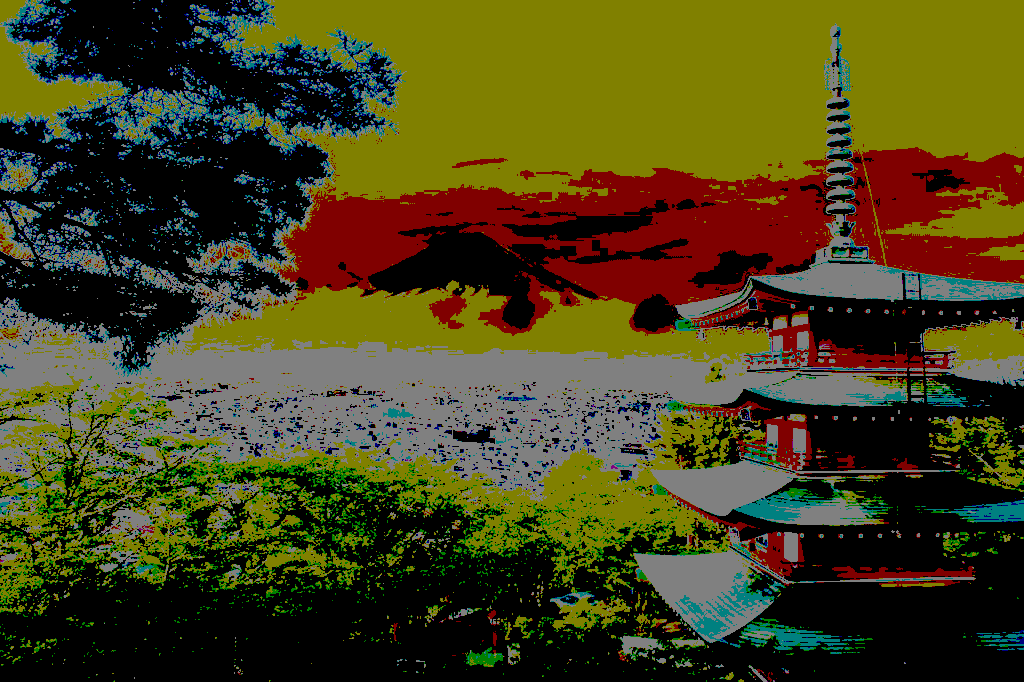

In [20]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Set the variables
color = True #@param {type:"boolean"}
Image = "Fuji" #@param ["Fuji", "Lake", "Rock"]
k_bits = 1 #@param {type:"slider", min:1, max:8, step:1}

# read the img
img = cv2.imread(Image + ".jpg", color)

# calculate 2^n for the division of the bits
nb = 2**(8-k_bits)

# only do the operation when k < 8
if k_bits < 8:
  kb_img =((np.around((img)/nb))*nb).astype('uint8')
else:
  kb_img = img

cv2_imshow(kb_img)

# **Actividad 2**
Realiza un programa en Python que reduzca una imagen a diferentes niveles de resolución
espacial tomando en cuenta un vecindario de tamaño N = 1, 3, 5, 7, …, en donde el valor de los
pixeles en el vecindario se representan por (a) la función max, y (b) la función min. Permitir al
usuario controlar los niveles de resolución, como el ejemplo de la siguiente figura

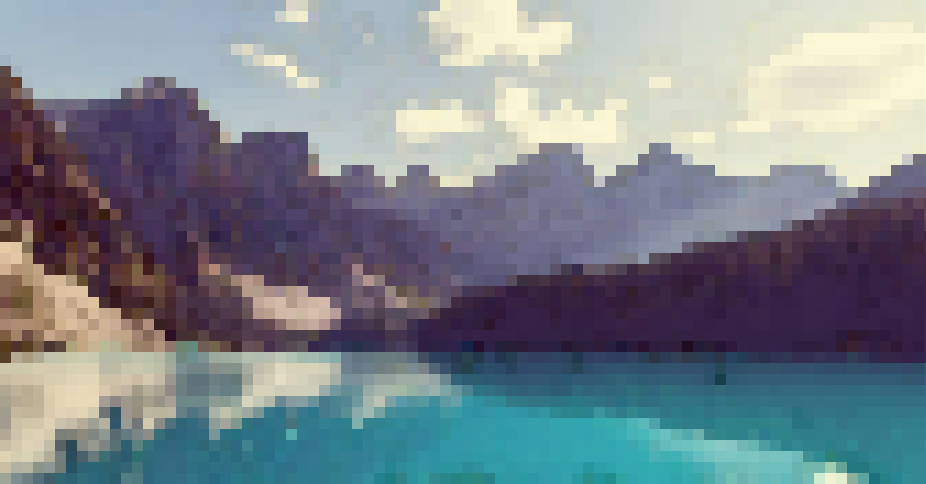

In [17]:
#### Codigo relativamente funcional de la act 2
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from math import ceil

# Set parameters
color = True #@param {type:"boolean"}
Image = "Lake" #@param ["Fuji", "Lake", "Rock"]
Function = "(b) Min function" #@param ["(a) Max function", "(b) Min function"]
Resolution = 11 #@param {type:"slider", min:1, max:55, step:2}
N = Resolution

# See if the Max function is selecte
f_flag = True if Function[1] == "a" else False   #Function flag

# Declare our function to calculate resolution
func = lambda x: max(x) if f_flag else min(x)

# Read image
img = cv2.imread(Image + ".jpg", color)

# Get the shape of the img
height = img.shape[0]
width = img.shape[1]

# Get the offset
offset = int((N-1)/2)

# If it's colored, it's going to happen on the three channels
if color:
  for k in range(3): # for each channel
    for j in range(ceil(height/N)): # travel the Y axis
      cy = int(offset + j*N)     #Center y of kernel
      for i in range(ceil(width/N)): # travel the X axis
        cx = int(offset + i*N)    #Center x of kernel
        kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] # calculate the kernel using offsets
        mv = func(map(func, kernel))  # Apply the function to the kernel
        img[cy - offset: cy + offset+1, cx - offset: cx + offset+1, k] = mv #override the img section with the modified kernel
else:
  for j in range(ceil(height/N)): # Y axis
    cy = int(offset + j*N)     #  Center y of kernel
    for i in range(ceil(width/N)): # X axis
      cx = int(offset + i*N)    # Center x of kernel
      kernel = img[cy - offset: cy + offset+1, cx - offset: cx + offset+1]
      mv = func(map(func, kernel))  # Apply the function
      img[cy - offset: cy + offset+1, cx - offset: cx + offset+1] = mv

cv2_imshow(img)


# **Actividad 3**
Donde g(x,y) es la imagen resultante de la combinación de dos imágenes f1 (x,y) y f2
(x,y), como
se muestra en la figura. Realiza un programa en python que ejecute dicha combinación lineal de
dos imágenes que el usuario elija desde un menú de imágenes preestablecidas y que le permita
controlar la ponderación de alfa.

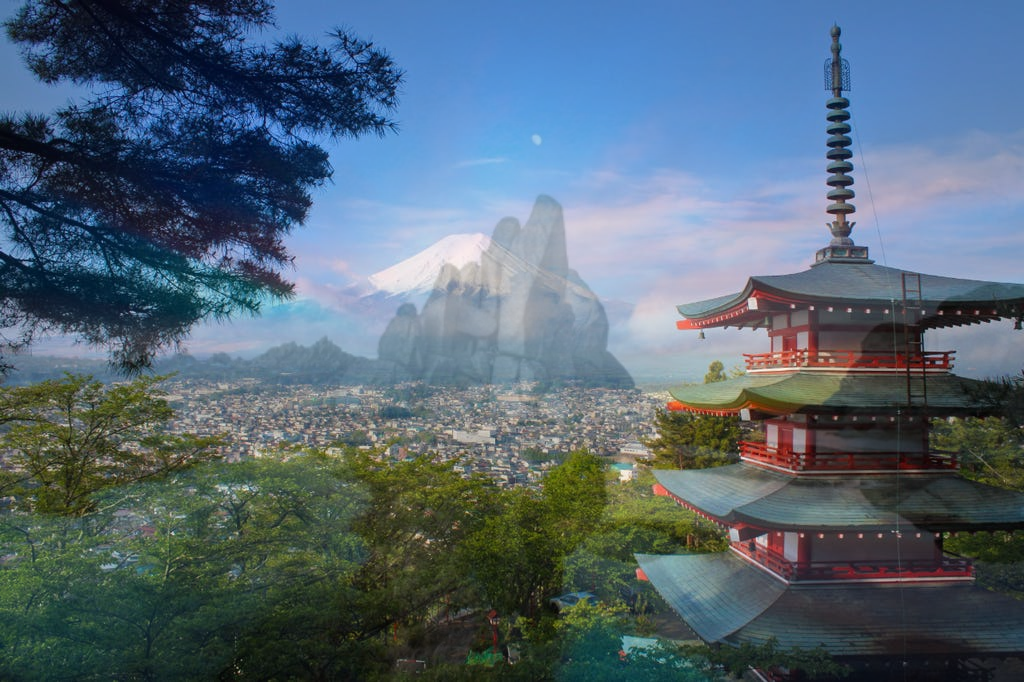

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Set parameters
Image_1 = "Fuji" #@param ["Fuji", "Lake", "Rock"]
Image_2 = "Rock" #@param ["Fuji", "Lake", "Rock"]
alpha = 0.74 #@param {type:"slider", min:0, max:1, step:0.01}

# Read the imgs
img1 = cv2.imread(Image_1 + ".jpg")
img2 = cv2.imread(Image_2 + ".jpg")

# Resize images 
if img1.shape[1] > img2.shape[1]:  #compare width
  img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))  #Resize images depending which is wider
else:
  img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0])) 

# Combine both images using around and the alpha value
res = np.around(alpha * img1 + (1 - alpha) * img2).astype(np.uint8)   #Linear combination

# Show the image
cv2_imshow(res)